### Authors: Pantelios Konstantinos,  Pavlidou Androniki
### Student numbers: 5374367,  5267536

## Image classification process

    Step 1. Combine bands and reshape the array as necessary for the K-means implementation

    Step 2. Definition of the number of clusters in the feature space -using the method of K-Means classification

    Step 3. Fitting the values into our algorithm and labelling the classes

    Step 5. Plotting the figure

Necessary libraries to run the code below

In [1]:
import rasterio
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.colors as colors
from rasterio.windows import Window

Reading and assigning variables for each of the various Bands (Sentinel-2 60m resolution image) 

In [2]:
c = rasterio.open('.\GRANULE\L2A_T31UET_A025788_20200530T105134\IMG_DATA\R60m\T31UET_20200530T105031_B01_60m.jp2') #Coastal aerosol
b = rasterio.open('.\GRANULE\L2A_T31UET_A025788_20200530T105134\IMG_DATA\R60m\T31UET_20200530T105031_B02_60m.jp2') #Blue
g = rasterio.open('.\GRANULE\L2A_T31UET_A025788_20200530T105134\IMG_DATA\R60m\T31UET_20200530T105031_B03_60m.jp2') #Green
r = rasterio.open('.\GRANULE\L2A_T31UET_A025788_20200530T105134\IMG_DATA\R60m\T31UET_20200530T105031_B04_60m.jp2') #Red
r_e5 = rasterio.open('.\GRANULE\L2A_T31UET_A025788_20200530T105134\IMG_DATA\R60m\T31UET_20200530T105031_B05_60m.jp2') #Veg. Red Edge
r_e6 = rasterio.open('.\GRANULE\L2A_T31UET_A025788_20200530T105134\IMG_DATA\R60m\T31UET_20200530T105031_B06_60m.jp2') #Veg. Red Edge
r_e7 = rasterio.open('.\GRANULE\L2A_T31UET_A025788_20200530T105134\IMG_DATA\R60m\T31UET_20200530T105031_B07_60m.jp2') #Veg. Red Edge
n_n = rasterio.open('.\GRANULE\L2A_T31UET_A025788_20200530T105134\IMG_DATA\R60m\T31UET_20200530T105031_B8A_60m.jp2') #Narrow NIR
w = rasterio.open('.\GRANULE\L2A_T31UET_A025788_20200530T105134\IMG_DATA\R60m\T31UET_20200530T105031_B09_60m.jp2') #Water varoup
s_1 = rasterio.open('.\GRANULE\L2A_T31UET_A025788_20200530T105134\IMG_DATA\R60m\T31UET_20200530T105031_B11_60m.jp2') #SWIR1
s_2 = rasterio.open('.\GRANULE\L2A_T31UET_A025788_20200530T105134\IMG_DATA\R60m\T31UET_20200530T105031_B12_60m.jp2') #SWIR2

coastal = c.read() #1
blue = b.read() #2
green = g.read() #3
red = r.read() #4
veg_red_edge5 = r_e5.read() #5
veg_red_edge6 = r_e6.read() #6
veg_red_edge7 = r_e7.read() #7
narrow_nir = n_n.read() #8A
water_v = w.read() #9
swir_1 = s_1.read() #11
swir_2 = s_2.read() #12


Reading and assigning variables for each of the various Bands (Sentinel-2 10m resolution image) 

In [3]:
b_10 = rasterio.open('.\GRANULE\L2A_T31UET_A025788_20200530T105134\IMG_DATA\R10m\T31UET_20200530T105031_B02_10m.jp2') #Blue
g_10 = rasterio.open('.\GRANULE\L2A_T31UET_A025788_20200530T105134\IMG_DATA\R10m\T31UET_20200530T105031_B03_10m.jp2') #Green
r_10 = rasterio.open('.\GRANULE\L2A_T31UET_A025788_20200530T105134\IMG_DATA\R10m\T31UET_20200530T105031_B04_10m.jp2') #Red
n = rasterio.open('.\GRANULE\L2A_T31UET_A025788_20200530T105134\IMG_DATA\R10m\T31UET_20200530T105031_B08_10m.jp2') # NIR

blue_10 = b_10.read() #2
green_10 = g_10.read() #3
red_10 = r_10.read() #4
nir_10 = n.read() #8

Given that the study area is known, after the classification, we expect to find on the ground the following (basic) objects:

* Water surfaces
* Vegetation 
* Soil ground
* Urban area
* Structure surfaces


# Classification of whole 60m resolution image 

# Defining parameters 

* Red(B04) - Green(B03) - Blue(B02) -- > clusters: (3, 4, 5 and 7)
* Red(B04) - Green(B03) - Blue(B02) - N-NIR(B8A) --> clusters: (3, 4 and 5)
* All available bands for 60m resolution --> clusters: (3, 4 and 5)
* SWIR2(B12) - N-NIR(B8A) - Red(B04) --> clusters:  (5)

In [114]:
# create an empty array with secific dimension
image_1 = np.empty((1830, 1830, 3))
# loop through bands to fill the empty array
l_1=[red,green,blue]
for band in range(image_1.shape[2]):
    image_1[:,:,band] = l_1[band]

In [115]:
image_fit_1=image_1[:,:,:3].reshape((image_1.shape[0]*image_1.shape[1],image_1.shape[2]))

 Calculating KMeans for number of clusters 3,4,5 and 7

 We chose to keep activated only the algorithm that uses 4 and 7 centers

In [116]:
k_means4_1 = KMeans(n_clusters=4) # KMeans algorithm 
param4_1 = k_means4_1.fit(image_fit_1) # Training the algorithm
class4_img_1 = k_means4_1.labels_ # Labels of the classes
class4_img_1 = class4_img_1.reshape(image_1[:,:,0].shape) # reshaping back the final image

In [117]:
k_means7_1 = KMeans(n_clusters=7) # KMeans algorithm
param7_1 = k_means7_1.fit(image_fit_1) # Training the algorithm
class7_img_1 = k_means7_1.labels_ # Labels of the classes
class7_img_1 = class7_img_1.reshape(image_1[:,:,0].shape) ## reshaping back the final image

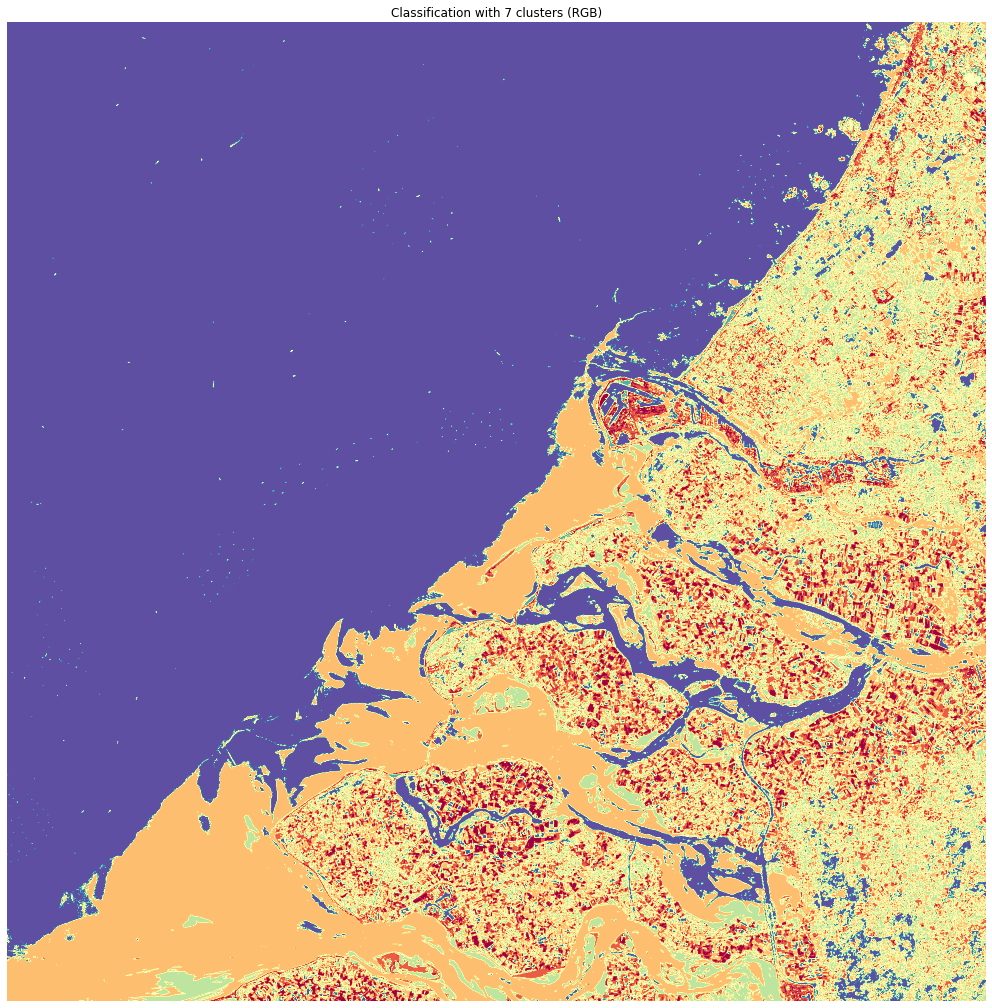

In [220]:
plt.figure(figsize=[18,18])
plt.imshow(class7_img_1,cmap="Spectral_r")
plt.title("Classification with 7 clusters (RGB)")
plt.axis('off')
plt.show()

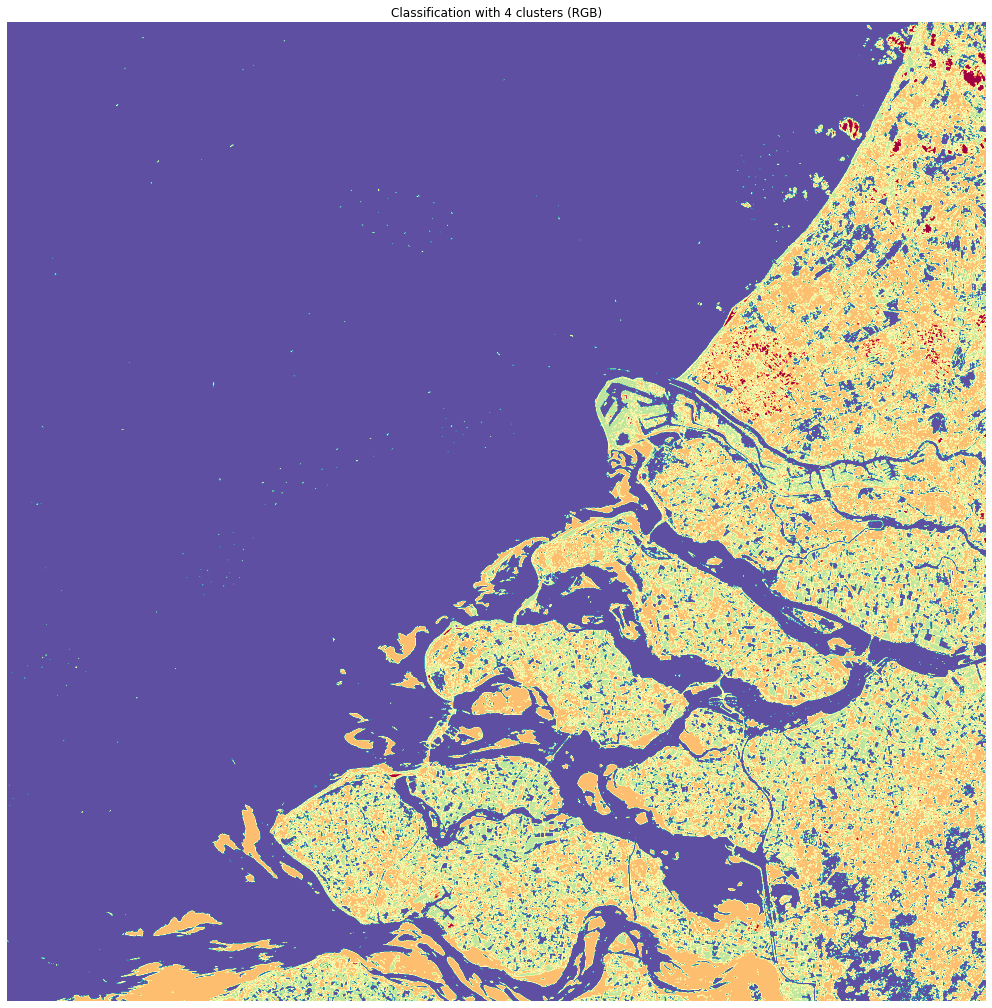

In [221]:
plt.figure(figsize=[18,18])
plt.imshow(class4_img_1,cmap="Spectral_r")
plt.title("Classification with 4 clusters (RGB)")
plt.axis('off')
plt.show()

Firstly, we chose Red-Green-Blue bands, because we wanted to observe the result of classification using bands that share some common attributes (high correlation), with 3 clusters. In order to classify the image given same modifications took place. That modifications concerned the reshape of the image in order to be on a right format for the code (X,Y, Number of clusters).

Regarding the results of classification apart from the sea (water) that consists the highest percentage of the image, there are no significant differences between the appeared objects and as a result, it is difficult to extract information about their class (ex. urban fabric, vegetation, agro-areas, water). 

In this term, we classified the image using 4 clusters. Τhe result of the classification was clearer. It can be seen separation of liquid element and land, while land uses such as urban fabric and vegetation are shown in more detail.

In order to see if we can extract even clearer results about land cover we classified the image with 5 clusters. The result in this case was more detailed compared with the previous one. It can be noticed the discrimination between sea’s water and water on the estuary but on the other hand, the classification made for the land cover was quite extensive in an extent that was confusing. We also checked with 7 clusters but the result was not manageable for drawing conclusions about the appeared objects.
    
From the above, results that the most “valid” classification is the one with the 4 clusters, since it combines the required information without much noise. 


# Classification of 60m using the bands R-G-B-NIR (red, green, blue, narrow-near infrared)

In [120]:
# create an empty array with secific dimension
image_2 = np.empty((1830, 1830, 4))
# loop through bands to fill the empty array
l_2=[red,green,blue,narrow_nir]
for band in range(image_2.shape[2]):
    image_2[:,:,band] = l_2[band]

In [121]:
image_fit_2=image_2[:,:,:4].reshape((image_2.shape[0]*image_2.shape[1],image_2.shape[2]))

Calculating KMeans for number of clusters 3,4 and 5 

We chose to keep activated only the algorithm that uses 5 centers

In [123]:
k_means5_2 = KMeans(n_clusters=5) # KMeans algorithm
param5_2 = k_means5_2.fit(image_fit_2) # Training the algorithm
class5_img_2 = k_means5_2.labels_ # Labels of the classes
class5_img_2 = class5_img_2.reshape(image_2[:,:,0].shape) ## reshaping back the final image

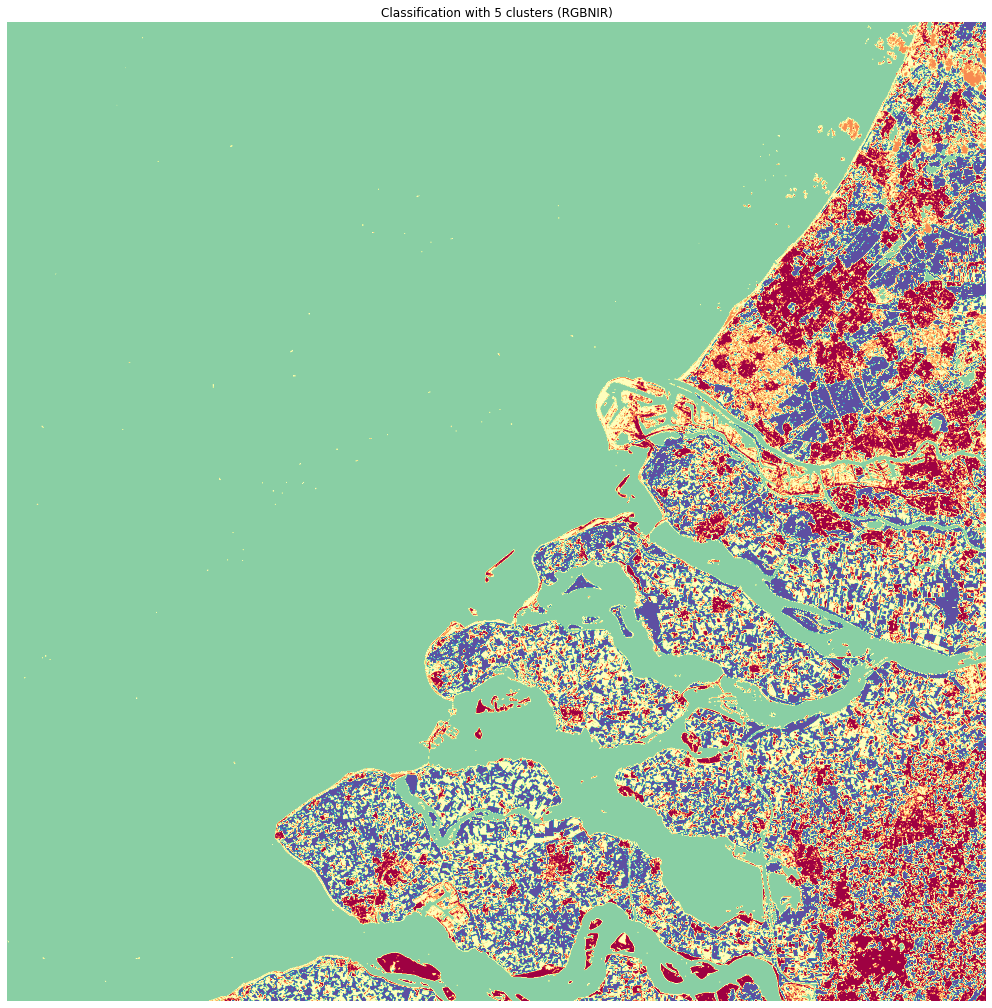

In [222]:
plt.figure(figsize=[18,18])
plt.imshow(class5_img_2,cmap='Spectral_r') 
plt.title("Classification with 5 clusters (RGBNIR)")
plt.axis('off')
plt.show()

Following the same steps as before, we added in the previous bands one more, the NIR one, in order to extract more information about the study area. Considering that the study area composed of certain materials, by adding NIR more detailed information can be obtained, about the reflected objects.  
    
Compared 3, 4 and 5 clusters we concluded that the most convenient and manageable classification is the one with 5, since it was easier to separate the different kind of classes (in theory: vegetation, urban fabric, water etc).Given the NIR band it was not difficult to present water without noise as well as for the structured surfaces to be more emphasized. 



# Classification of 60m using all availiable bands

In [131]:
# create an empty array with secific dimension
image_3 = np.empty((1830, 1830, 11))
# loop through bands to fill the empty array
l_3=[coastal,red,green,blue,veg_red_edge5,veg_red_edge6,veg_red_edge7,narrow_nir,water_v,swir_1,swir_2]
for band in range(image_3.shape[2]):
    image_3[:,:,band] = l_3[band]

In [132]:
image_fit_3=image_3[:,:,:11].reshape((image_3.shape[0]*image_3.shape[1],image_3.shape[2]))

Calculating KMeans for number of clusters 3,4 and 5

We chose to keep activated only the algorithm that uses 5 centers

In [133]:
k_means5_3 = KMeans(n_clusters=5) # KMeans algorithm 
param5_3 = k_means5_3.fit(image_fit_3) # Training the algorithm 
class5_img_3 = k_means5_3.labels_ # Labels of the classes
class5_img_3 = class5_img_3.reshape(image_3[:,:,0].shape) # reshaping back the final image

In this case, the classified image was even more accurate, since we combined all bands with their different wavelengths. We observed that the majority of the objects appeared in the study area was more clearly defined; this is evident from the fact that we can separate (apart from water, vegetation and urban areas) the basic road network of the region. We chose 5 clusters since after trial and error with this one we took objective results.


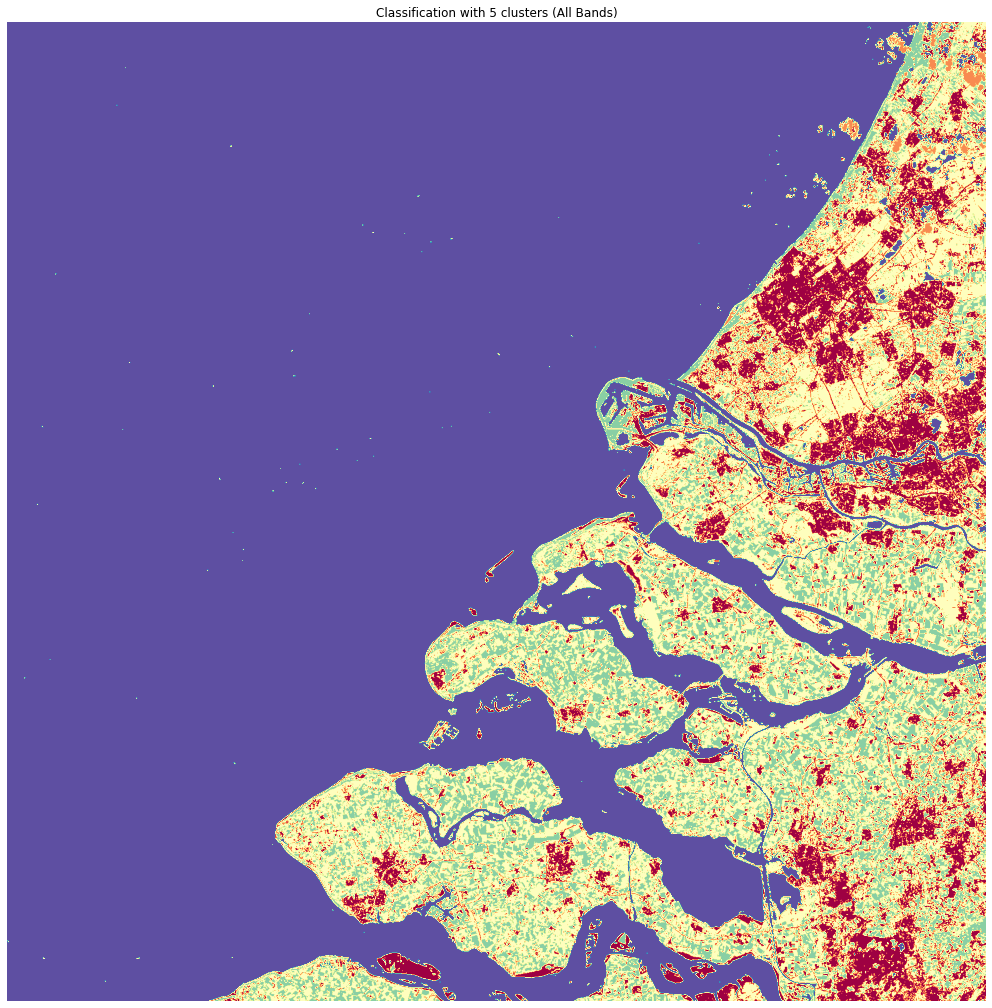

In [223]:
plt.figure(figsize=[18,18])
plt.imshow(class5_img_3,cmap='Spectral_r')
plt.title("Classification with 5 clusters (All Bands)")
plt.axis('off')
plt.show()

# Classification of 60m for SWIR (Swir1,Near-Infrared,Red)

In [72]:
# create an empty array with secific dimension
image_6 = np.empty((1830, 1830, 3))
# loop through bands to fill the empty array
l_6=[swir_2,narrow_nir,red]
for band in range(image_6.shape[2]):
    image_6[:,:,band] = l_6[band]

In [73]:
image_fit_6=image_6[:,:,:3].reshape((image_6.shape[0]*image_6.shape[1],image_6.shape[2]))

In [300]:
k_means5_6 = KMeans(n_clusters=5) # KMeans algorithm
param5_6 = k_means5_6.fit(image_fit_6) # Training the algorithm 
class5_img_6 = k_means5_6.labels_ # Labels of the classes
class5_img_6 = class3_img_6.reshape(image_6[:,:,0].shape) # reshaping back the final image

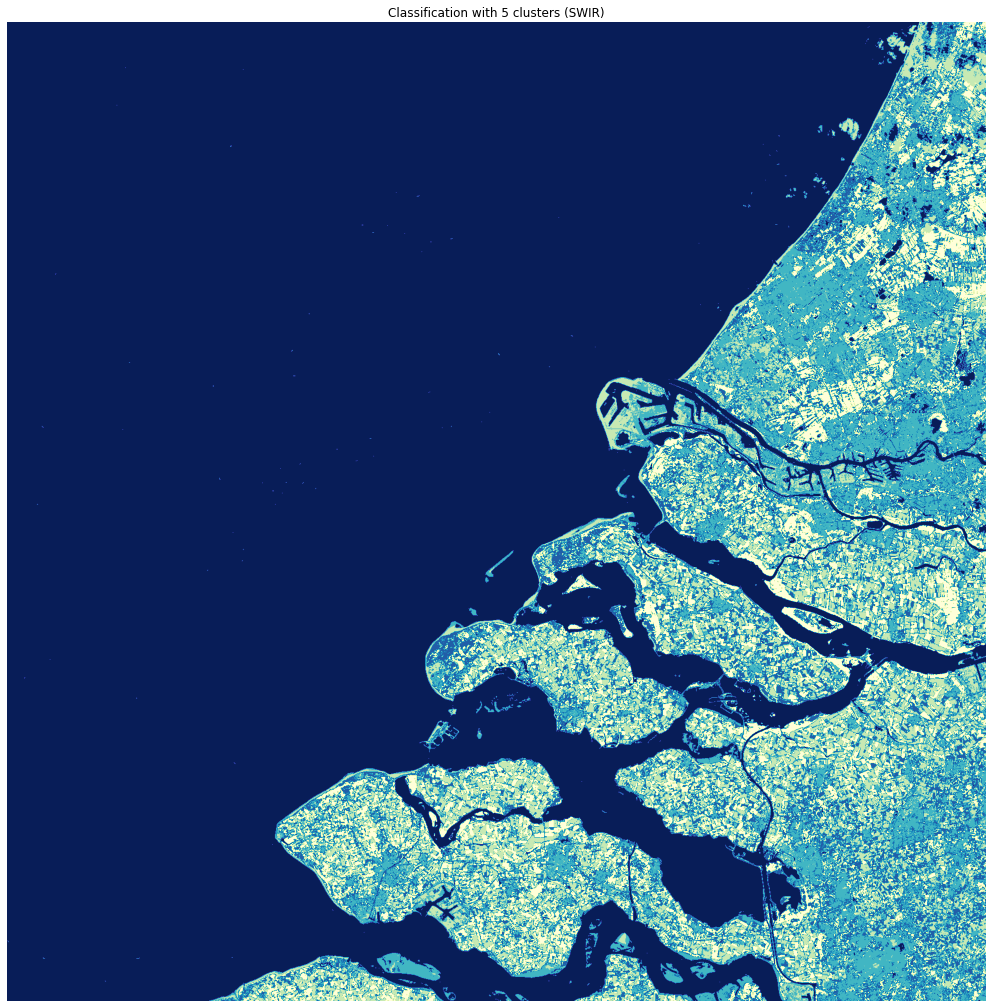

In [315]:
plt.figure(figsize=[18,18])
plt.imshow(class5_img_6,cmap="YlGnBu_r") 
plt.axis('off')
plt.title("Classification with 5 clusters (SWIR)")
plt.show()


Apart from the above combinations, we tried to connect bands SWIR2-NarrowNIR-Red. Specifically we combined one visible band with two infra-red in order to evaluate significant differences with the above classifications. With the number of clusters equal to 5 and applying K-means for the classification the outcome (classified image) is less manageable for extracting information about surface’s objects. 

# Classification of the subset image of the 10m resolution

## Defining parameters 

* Red(B04) - Green(B03) - Blue(B02) -- > clusters: (3, 4, and 5)
* Red(B04) - Green(B03) - Blue(B02) - NIR(B08) --> clusters: (3, 4 and 5)
* NIR(B08) - Red(B04) - Green(B03) --> clusters: (3, 4 and 5)


In [135]:
row, col = b_10.index(601200.0, 5773695.0)

In [136]:
w_b = b_10.read(1, window=Window(col,row, 700, 500))
w_g = g_10.read(1, window=Window(col,row, 700, 500))
w_r = r_10.read(1, window=Window(col,row, 700, 500))

In [137]:
# create an empty array with secific dimension
image_4 = np.empty((500, 700, 3))
# loop through bands to fill the empty array
l_4=[w_r,w_g,w_b]
for band in range(image_4.shape[2]):
    image_4[:,:,band] = l_4[band]

In [138]:
image_fit_4=image_4[:,:,:3].reshape((image_4.shape[0]*image_4.shape[1],image_4.shape[2]))

After modifying the image (resolution =10m) we classified it three times using the bands (RGB), with 3, 4 and 5 clusters. From the results, we noticed that with 3 clusters the outcome was not representative since there were not significant discrimination through the objects. On the other hand from the images emerged from cluster 4 and 5 the latter one was better than the former one but in any case we would not choose these combination of bands and number of clusters for extracting results about land cover. With resolution equals to 10 meters we have more precise representation of the study area and so we should combine bands with different characteristics, regarding their wavelength, in order to notice the variety of the reflected energy (of each object). 

# Classification of 10m for RGBNIR

In [139]:
w_nir= n.read(1, window=Window(col,row, 700, 500))

In [140]:
# create an empty array with secific dimension
image_5 = np.empty((500, 700, 4))
# loop through bands to fill the empty array
l_5=[w_r,w_g,w_b,w_nir]
for band in range(image_5.shape[2]):
    image_5[:,:,band] = l_5[band]

In [141]:
image_fit_5=image_5[:,:,:4].reshape((image_5.shape[0]*image_5.shape[1],image_5.shape[2]))

In [142]:
k_means5_5 = KMeans(n_clusters=5) # KMeans algorithm
param5_5 = k_means5_5.fit(image_fit_5) # Training the algorithm 
class5_img_5 = k_means5_5.labels_ # Labels of the classes
class5_img_5 = class5_img_5.reshape(image_5[:,:,0].shape) # reshaping back the final image

# Classification of 10m for NIRRG

In [239]:
# create an empty array with secific dimension
image_7 = np.empty((500, 700, 3))
# loop through bands to fill the empty array
l_7=[w_nir,w_r,w_g]
for band in range(image_7.shape[2]):
    image_7[:,:,band] = l_7[band]

In [240]:
image_fit_7=image_7[:,:,:3].reshape((image_7.shape[0]*image_7.shape[1],image_7.shape[2]))

In [289]:
k_means3_7 = KMeans(n_clusters=3) # KMeans algorithm
param3_7 = k_means3_7.fit(image_fit_7) # Training the algorithm 
class3_img_7 = k_means3_7.labels_ # Labels of the classes
class3_img_7 = class3_img_7.reshape(image_7[:,:,0].shape) # reshaping back the final image

In [278]:
k_means5_7 = KMeans(n_clusters=5) # KMeans algorithm
param5_7 = k_means5_7.fit(image_fit_7) # Training the algorithm 
class5_img_7 = k_means5_7.labels_ # Labels of the classes
class5_img_7 = class5_img_7.reshape(image_7[:,:,0].shape) # reshaping back the final image

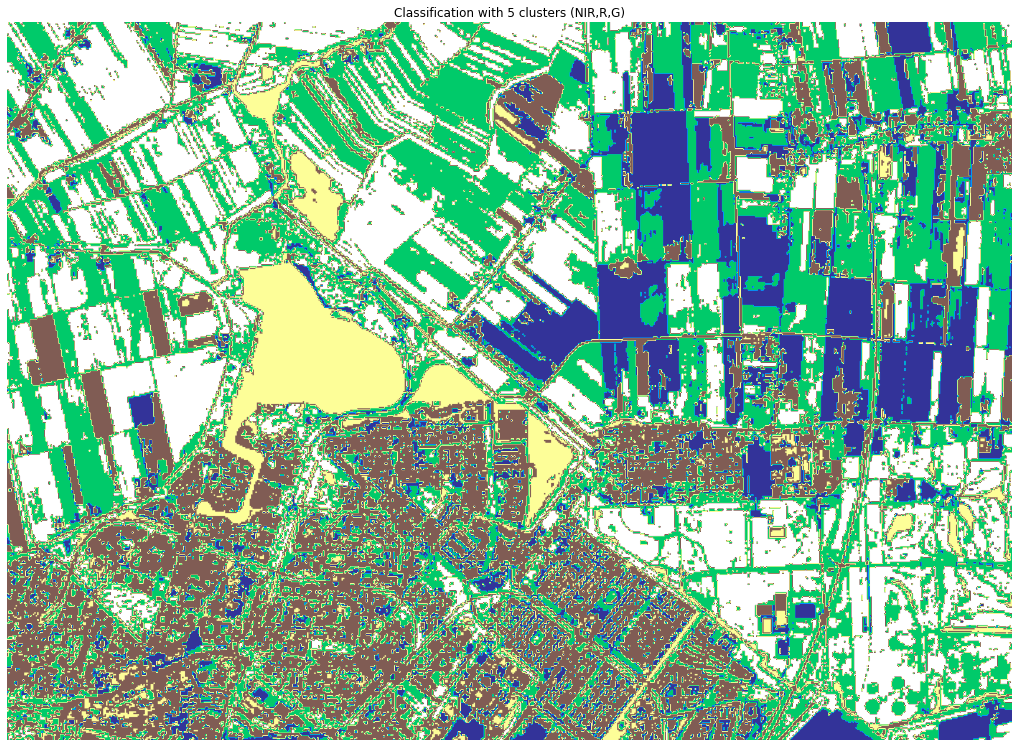

In [318]:
plt.figure(figsize=[18,18])
plt.imshow(class5_img_7,cmap="terrain_r")
plt.title("Classification with 5 clusters (NIR,R,G)")
plt.axis('off')
plt.show()

Since the outcome of the previous combination was not manageable, we chose RGB- NIR, and the classified image seemed more accurate. After using 3, 4 and 5 clusters for the former combination of bands it can noticed that all the classifications were clear with the last one (5 clusters) being more detailed regarding the representation of the image’s objects. In this case, we noticed that the majority of the classes, mentioned at the beginning of this report, is sufficiently classified.
Comparing RGB-NIR and NIR-R-G it seems that the classified image derives from them is almost the same (even if the colour map plots the classes differently.) 
We noted that every time we used NIR band in combination with visible bands the results emerged from the classification were more apparent.


## Conclusion

Considering all the above results deriving from the different combination of bands and clusters, we can make some conclusions regarding the K-Means algorithm usage for classification:

* Judging from our results we conculde that the algorithm gives medium level accuracy on the classification of the objects. This is due to K-Means basic drawback. 
The main drawback is that we cannot be sure about the quality-accuracy of the results since the quality of the final clusters heavily depends on the selection of the initial centroids, which are assigned randomly. To assess this obstacle is to validate classification’s results with ground truth.


* In any case, the number of clusters and the selection of an appropriate band matching depends on each project and on what we want to represent. Since we wanted to represent some basic classes, 5 clusters can support our argument.


* Combining bands with quite different wavelenght we capture as result a wider variaty of different objects due to their reflective properties of their spectral signature. 
    
    
Note: In our report, we did not match certain colors with specific classes since the classification is unsupervised. Our comments about the classification depend solely on K-Means algorithm's output.


### Feedback about the workload

We started working on the assignment on Sunday (26/09) and we finished it on Sunday (04/10). We spent about 8 hours/day since we haven’t experience with jupyter/pandas/numpy etc. and so we had to learn how to operate and work the different libraries and software.